<a href="https://colab.research.google.com/github/GreatLearningAIML1/bangalore-aug19-batch-vybhavsv/blob/master/Advance_Computer_Vision_CNN_R_Project2_FaceRecognition_Vybhav_SV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [19]:
import tensorflow as tf
tf.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/My Drive/Colab_Notebooks/ACV_Proj')
cwd = '/content/drive/My Drive/Colab_Notebooks/ACV_Proj'
print(cwd)

/content/drive/My Drive/Colab_Notebooks/ACV_Proj


#### Change current working directory to project folder (2 mark)

In [4]:
os.getcwd()

'/content/drive/My Drive/Colab_Notebooks/ACV_Proj'

In [ ]:
os.listdir('/content/drive/My Drive/Colab_Notebooks/ACV_Proj')

### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [8]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = '/content/drive/My Drive/Colab_Notebooks/ACV_Proj/'+"Aligned Face Dataset.zip"
print(file_name,'\n')  

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip:   
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 

/content/drive/My Drive/Colab_Notebooks/ACV_Proj/Aligned Face Dataset.zip 

Extracting all the files now...


In [9]:
unzipped = True
if (not unzipped):
  !unzip 'Aligned Face Dataset.zip'
else:
  print('Unzipped already..')  

Unzipped already..


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [10]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [11]:
metadata.shape

(10770,)

In [12]:
metadata[1069]

PINS/pins_Caity Lotz/Caity Lotz91.jpg

In [13]:
type(metadata[1500]), metadata[1069].image_path()

(__main__.IdentityMetadata, 'PINS/pins_Caity Lotz/Caity Lotz91.jpg')

### Define function to load image
- Define a function to load image from the metadata

In [14]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

In [15]:
#### Add your code here ####
load_image('PINS/pins_selena gomez/selena gomez48.jpg')

array([[[ 47,  33,  32],
        [ 54,  40,  39],
        [ 57,  43,  42],
        ...,
        [ 87, 120, 127],
        [ 86, 119, 126],
        [ 85, 118, 125]],

       [[ 50,  36,  35],
        [ 56,  42,  41],
        [ 60,  46,  45],
        ...,
        [ 93, 126, 133],
        [ 91, 124, 131],
        [ 90, 123, 130]],

       [[ 54,  40,  39],
        [ 61,  47,  46],
        [ 66,  52,  51],
        ...,
        [101, 134, 141],
        [ 99, 132, 139],
        [ 96, 129, 136]],

       ...,

       [[125,  38,  19],
        [124,  37,  18],
        [125,  36,  18],
        ...,
        [ 52,  11,  17],
        [ 54,  12,  16],
        [ 55,  13,  15]],

       [[129,  42,  23],
        [128,  41,  22],
        [128,  39,  21],
        ...,
        [ 51,  12,  17],
        [ 53,  12,  18],
        [ 54,  13,  17]],

       [[133,  46,  27],
        [131,  44,  25],
        [131,  42,  24],
        ...,
        [ 49,  13,  17],
        [ 52,  13,  18],
        [ 54,  13,  17]]

In [16]:
os.listdir('PINS/pins_Aaron Paul')[:9]

['Aaron Paul0_262.jpg',
 'Aaron Paul101_247.jpg',
 'Aaron Paul101_248.jpg',
 'Aaron Paul101_249.jpg',
 'Aaron Paul103_217.jpg',
 'Aaron Paul113_228.jpg',
 'Aaron Paul114_271.jpg',
 'Aaron Paul116_240.jpg',
 'Aaron Paul117_213.jpg']

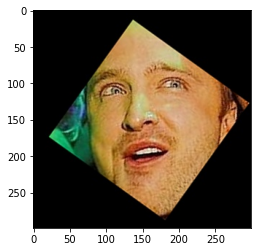

In [17]:
import matplotlib.pyplot as plt
plt.imshow(load_image('PINS/pins_Aaron Paul/Aaron Paul117_213.jpg'))

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [22]:
model = vgg_face()
model.load_weights('/content/drive/My Drive/Colab_Notebooks/ACV_Proj/'+"vgg_face_weights.h5")

### Get vgg_face_descriptor

In [23]:
model.layers[0], model.layers[-2]

(<tensorflow.python.keras.layers.convolutional.ZeroPadding2D at 0x7fec012ad278>,
 <tensorflow.python.keras.layers.core.Flatten at 0x7feb93fbde10>)

In [25]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [26]:
type(vgg_face_descriptor)

tensorflow.python.keras.engine.functional.Functional

In [27]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<tf.Tensor 'zero_padding2d_input:0' shape=(None, 224, 224, 3) dtype=float32>],
 [<tf.Tensor 'flatten/Reshape:0' shape=(None, 2622) dtype=float32>])

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [28]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [29]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(0.031703066, numpy.ndarray, numpy.float32)

In [30]:
embedding_vector[2],embedding_vector[98],embedding_vector[-2]

(-0.012434022, -0.008693813, 0.002190807)

### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [31]:
total_images = len(metadata)
total_images

10770

In [32]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

In [33]:
embeddings.shape

(10770, 2622)

In [34]:
embeddings[0], embeddings[988], embeddings[988].shape

(array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
         0.00219081, -0.00908097]),
 array([-0.00044259,  0.01826   ,  0.01218895, ..., -0.03309939,
         0.0113669 ,  0.02154321]),
 (2622,))

In [35]:
embeddings[8275]

array([ 0.01786545,  0.00912621,  0.00244408, ..., -0.02196857,
        0.01290167,  0.04220533])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [36]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

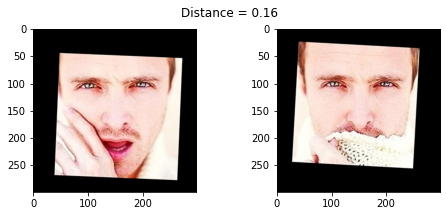

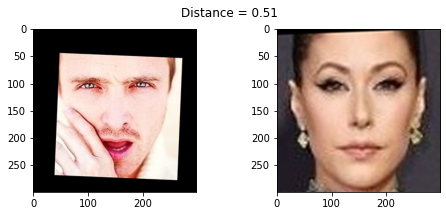

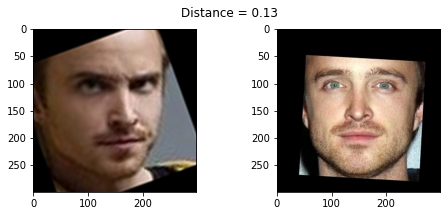

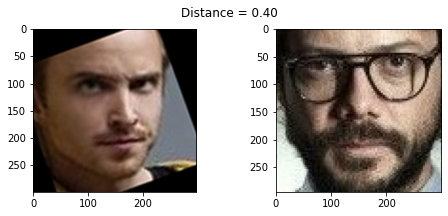

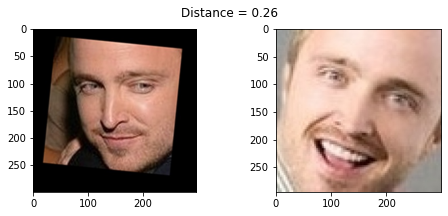

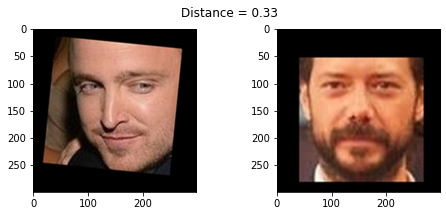

In [37]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

show_pair(30, 31)
show_pair(30, 100)

show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [38]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
#### Add your code here ####
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
#### Add your code here ####
y_test = targets[test_idx]

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9573, 2622), (1197, 2622), (9573,), (1197,))

In [40]:
y_test[0], y_train[988]

('pins_Aaron Paul', 'pins_Cameron Monaghan')

In [41]:
len(np.unique(y_test)), len(np.unique(y_train))

(100, 100)

### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [42]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

print(le.classes_,'\n')

print(np.unique(y_test_le))

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman '
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_

In [43]:
y_test_le, y_train_le

(array([ 0,  0,  0, ..., 99, 99, 99]), array([ 0,  0,  0, ..., 99, 99, 99]))

### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [44]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

print(np.unique(X_test_ss))

[-5.20740979 -5.20672351 -5.20373437 ...  9.09428973  9.32775774
  9.45060716]


### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [45]:
X_train_ss.shape,X_test_ss.shape, y_train_le.shape, y_test_le.shape

((9573, 2622), (1197, 2622), (9573,), (1197,))

In [46]:
from sklearn.decomposition import PCA

#### Add your code here ####

# Making an instance of the PCA model with 128 n_components
pca = PCA(n_components=128)

X_train_pca = pca.fit_transform(X_train_ss)
X_test_pca = pca.transform(X_test_ss)

### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#### Add your code here ####
svm = SVC()
svm.fit(X_train_pca, y_train_le)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
y_predict = svm.predict(X_test_pca)

In [58]:
y_predict, y_test_le

(array([ 0,  0,  0, ..., 99, 99, 99]), array([ 0,  0,  0, ..., 99, 99, 99]))

In [59]:
y_predict_le = le.inverse_transform(y_predict)
y_predict_le

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
       'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29')

In [60]:
y_predict.shape

(1197,)

In [61]:
y_test_le.shape

(1197,)

In [62]:
y_test_le[32:49]

array([2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4])

In [63]:
acc = accuracy_score(y_test_le, y_predict)
print(f'Support Vector Machine accuracy = {acc}')

Support Vector Machine accuracy = 0.9598997493734336


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

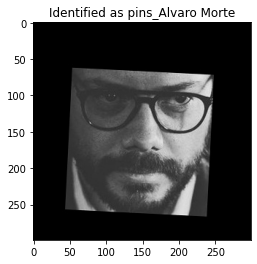

In [64]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] #### Add your code here ####
example_identity =  y_predict_le[example_idx] #le.inverse_transform(example_prediction) [0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

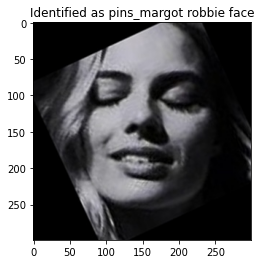

In [65]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 1069

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] #### Add your code here ####
example_identity =  y_predict_le[example_idx] #le.inverse_transform(example_prediction) [0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

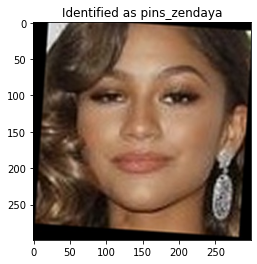

In [68]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 1196

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] #### Add your code here ####
example_identity =  y_predict_le[example_idx] #le.inverse_transform(example_prediction) [0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

(224, 224, 3)
(2622,)


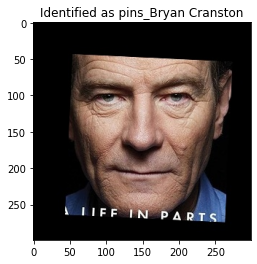

In [71]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 100

example_image = load_image(metadata[test_idx][example_idx].image_path())

# Get embedding vector for first image in the metadata using the pre-trained model
img = example_image

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

#### Add your code here ####
example_prediction = y_predict[example_idx]
example_identity = y_predict_le[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');